In [5]:
# The goal of this project is to find the factors that have the highest correlation to a Movie's Gross Earnings


# Import Databases

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# Readin Data

df = pd.read_csv(r'C:\Users\Alex Peter\Downloads\movies.csv')


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
# Drop rows with missing values. we are left with ~ 71% of data

df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [12]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
# Change column types from float64 to int64 to get rid of decimal points


df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [19]:
pd.set_option('display.max_rows', None)

In [22]:
df = df.sort_values(by = ['gross'], inplace = False, ascending =False)

In [47]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,Avengers: Endgame,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0
3045,Titanic,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,Avengers: Infinity War,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0


<function matplotlib.pyplot.show(close=None, block=None)>

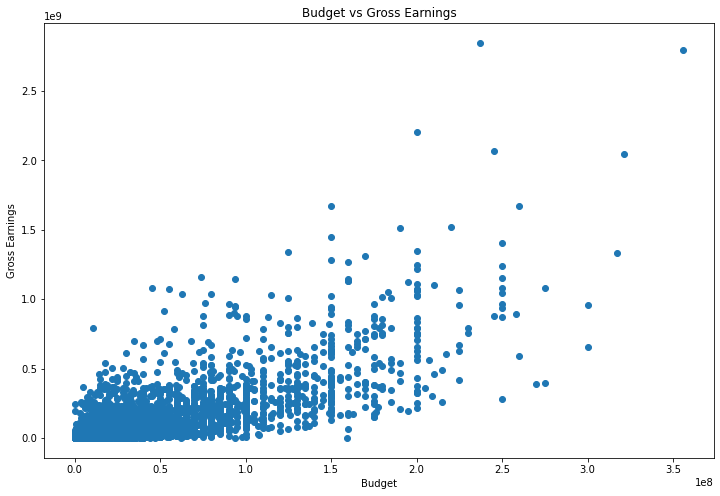

In [25]:
# Build a scatterplot of budget vs gross 


plt.scatter(x = df['budget'] , y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

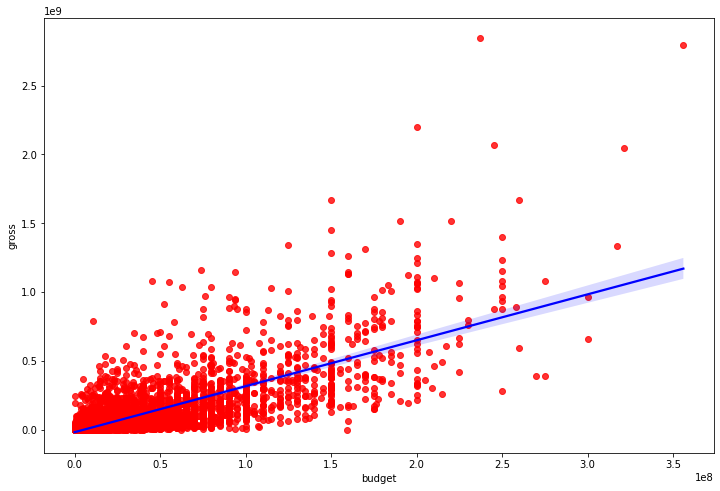

In [27]:
# PLot a regression plot using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={"color": "red"}, line_kws= {"color": 'blue'})

In [28]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


<AxesSubplot:>

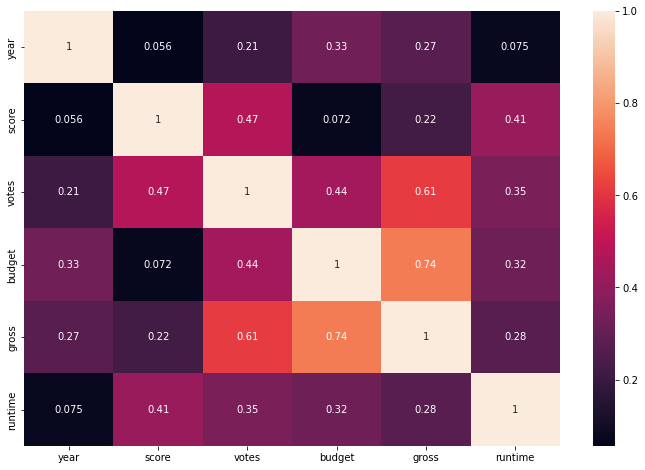

In [30]:
# Create a heatmap using seaborn to find values with high correlation


corrleation_matrix = df.corr()
sns.heatmap(corrleation_matrix, annot = True)

In [49]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 5445 to 3203
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      5421 non-null   category
 1   rating    5421 non-null   int8    
 2   genre     5421 non-null   int8    
 3   year      5421 non-null   int64   
 4   released  5421 non-null   int16   
 5   score     5421 non-null   float64 
 6   votes     5421 non-null   int64   
 7   director  5421 non-null   int16   
 8   writer    5421 non-null   int16   
 9   star      5421 non-null   int16   
 10  country   5421 non-null   int8    
 11  budget    5421 non-null   int64   
 12  gross     5421 non-null   int64   
 13  company   5421 non-null   int16   
 14  runtime   5421 non-null   float64 
dtypes: category(1), float64(2), int16(5), int64(4), int8(3)
memory usage: 546.6 KB


In [37]:
# Change 'object' type  columns to 'category' type and assign unique category codes using cat codes.


df_numeric = df

for col_name in df_numeric.columns:
    if (df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes

In [52]:
df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,Avengers: Endgame,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0
3045,Titanic,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,Avengers: Infinity War,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0


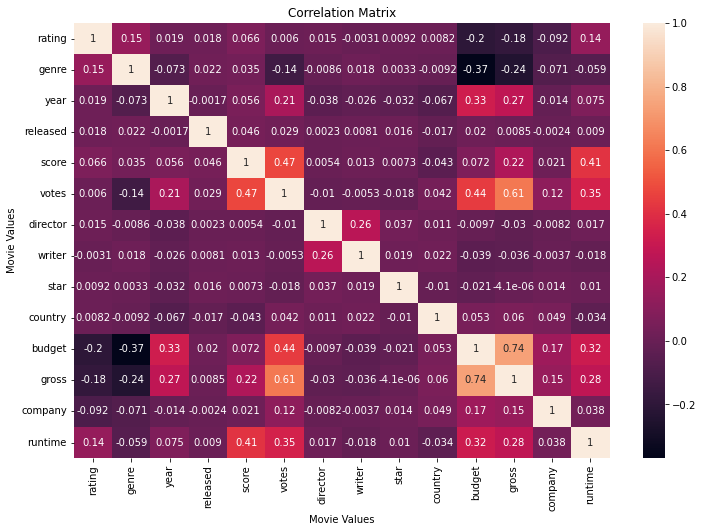

In [51]:
#Plot heatmap of all columns 
corrleation_matrix = df_numeric.corr()
sns.heatmap(corrleation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Values')
plt.ylabel('Movie Values')

plt.show()

In [42]:


corr_pairs = corrleation_matrix.unstack()
corr_pairs

rating    rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     rating      0.147796
          genre       1.000000
          year       -0.073167
          released    0.022142
          score       0.035106
          votes      -0.135990
          director   -0.008553
          writer      0.017578
          star        0.003341
          country    -0.009164
          budget     -0.368523
          gross      -0.244101
          company    -0.071334
          runtime    -0.059237
year      rating      0.019499
          genre      -0.073167
          year        1.000000
          released   -0.001740
        

In [46]:
high_corr = corr_pairs[(corr_pairs) > 0.5]
high_corr

rating    rating      1.000000
genre     genre       1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
votes     votes       1.000000
          gross       0.614751
director  director    1.000000
writer    writer      1.000000
star      star        1.000000
country   country     1.000000
budget    budget      1.000000
          gross       0.740247
gross     votes       0.614751
          budget      0.740247
          gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Budget and Gross has the highest correlation of 0.74 
# Votes and Gross has the second highest correlation of 0.61

# Budget and votes have the highest impact on Gross earnings.